In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv('Data.csv')
df = pd.read_csv("Data.csv")
state_data = pd.read_csv("State_data.csv")
data['date'] = pd.to_datetime(data['Timestamp'])
funding = pd.read_csv('NCAP_Funding.csv')
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import statistics
import math

In [36]:
pip install cartopy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 8.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 8.9 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/11.0 MB 8.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 8.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 7.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 6.6 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
funding['2019-20'] = pd.to_numeric(funding['Amount released during FY 2019-20'], errors = 'coerce').fillna(0)
funding['2020-21'] = pd.to_numeric(funding['Amount released during FY 2020-21'], errors = 'coerce').fillna(0)
funding['2021-22'] = pd.to_numeric(funding['Amount released during FY 2021-22'], errors = 'coerce').fillna(0)

# Spatial aggregation

In [13]:
#1
data=pd.read_csv('Data.csv')
data.columns=data.columns.str.strip()
data['PM2.5']=pd.to_numeric(data['PM2.5'],errors='coerce')
state_avg=data.groupby('state')['PM2.5'].mean()

print(f"The state with the highest average PM2.5 concentration is {state_avg.idxmax()} with an average of {state_avg.max():.2f}")

The state with the highest average PM2.5 concentration is Delhi with an average of 104.10


In [27]:
#2
df = pd.read_csv("Data.csv")
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_2023 = df[df["Timestamp"].dt.year == 2023]
df_2023 = df_2023.dropna(subset=["PM2.5", "state"])
hazardous_days = df_2023[df_2023["PM2.5"] > 300]
state_hazardous_days = hazardous_days.groupby("state")["Timestamp"].nunique()
most_hazardous_state = state_hazardous_days.idxmax()
most_hazardous_days = state_hazardous_days.max()

print(f"State with the most hazardous PM2.5 days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")

State with the most hazardous PM2.5 days in 2023: Delhi (49 days)


In [25]:
#3
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_2023 = df[df["Timestamp"].dt.year == 2023]
df_2023 = df_2023.dropna(subset=["PM2.5", "state"])
state_variability = df_2023.groupby("state")["PM2.5"].std()
most_variable_state = state_variability.idxmax()
highest_variability = state_variability.max()

print(f"State with the highest variability in PM2.5 levels in 2023: {most_variable_state} ({highest_variability:.2f})")

State with the highest variability in PM2.5 levels in 2023: Delhi (82.80)


In [29]:
#4
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_covid = df[df["Timestamp"].dt.year.isin([2020, 2021])]
df_covid = df_covid.dropna(subset=["PM2.5", "state"])
state_avg_pm25_covid = df_covid.groupby("state")["PM2.5"].mean()
lowest_pm25_state = state_avg_pm25_covid.idxmin()
lowest_pm25_value = state_avg_pm25_covid.min()

print(f"State with lowest average PM2.5 concentration during Covid period (2020-2021): {lowest_pm25_state} ({lowest_pm25_value:.2f} µg/m³)")

State with lowest average PM2.5 concentration during Covid period (2020-2021): Mizoram (14.32 µg/m³)


# Temporal Aggregation

In [33]:
#1
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_aug_2020 = df[(df["Timestamp"].dt.year == 2020) & (df["Timestamp"].dt.month == 8)]
df_aug_2020 = df_aug_2020.dropna(subset=["PM2.5", "station"])
highest_pm25_station = df_aug_2020.loc[df_aug_2020["PM2.5"].idxmax(), "station"]
highest_pm25_value = df_aug_2020["PM2.5"].max()

print(f"Station that recorded the highest PM2.5 value in August 2020: {highest_pm25_station} ({highest_pm25_value:.2f} µg/m³)")

Station that recorded the highest PM2.5 value in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


In [49]:
#2
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_2018 = df[df["Timestamp"].dt.year == 2018]
stations = ["Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
df_2018 = df_2018[df_2018["station"].isin(stations)]

winter_months = [12, 1, 2]
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

def get_season(month):
    if month in winter_months:
        return "Winter"
    elif month in summer_months:
        return "Summer"
    elif month in monsoon_months:
        return "Monsoon"
    else:
        return "Other"
df_2018["Season"] = df_2018["Timestamp"].dt.month.apply(get_season)

seasonal_avg_pm25 = df_2018.groupby("Season")["PM2.5"].mean()

most_polluted_season = seasonal_avg_pm25.idxmax()
highest_pm25_value = seasonal_avg_pm25.max()

print("Average PM2.5 concentration for each season in 2018:")
print(seasonal_avg_pm25)
print(f"Season with the highest pollution: {most_polluted_season} ({highest_pm25_value:.2f} µg/m³)")

Average PM2.5 concentration for each season in 2018:
Season
Monsoon    34.425196
Other      56.825144
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64
Season with the highest pollution: Winter (67.49 µg/m³)


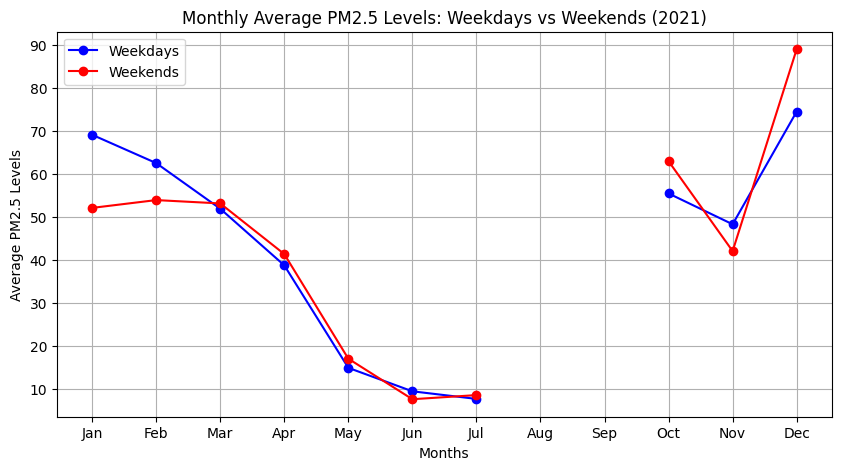

In [44]:
#3
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_2021 = df[df["Timestamp"].dt.year == 2021]
df_2021 = df_2021[df_2021["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
df_2021["DayOfWeek"] = df_2021["Timestamp"].dt.dayofweek
df_2021["IsWeekend"] = df_2021["DayOfWeek"].isin([5, 6])
df_2021["Month"] = df_2021["Timestamp"].dt.month
weekday_avg = df_2021[df_2021["IsWeekend"] == False].groupby("Month")["PM2.5"].mean()
weekend_avg = df_2021[df_2021["IsWeekend"] == True].groupby("Month")["PM2.5"].mean()

plt.figure(figsize=(10, 5))
plt.plot(weekday_avg.index, weekday_avg, marker='o', linestyle='-', label='Weekdays', color='blue')
plt.plot(weekend_avg.index, weekend_avg, marker='o', linestyle='-', label='Weekends', color='red')
plt.xlabel("Months")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels: Weekdays vs Weekends (2021)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()

# Spatio-temporal aggregation

In [56]:
#1
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_2022 = df[df["Timestamp"].dt.year == 2022]

summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]
df_summer = df_2022[df_2022["Timestamp"].dt.month.isin(summer_months)]
df_monsoon = df_2022[df_2022["Timestamp"].dt.month.isin(monsoon_months)]
summer_avg = df_summer.groupby("state")["PM2.5"].mean()
monsoon_avg = df_monsoon.groupby("state")["PM2.5"].mean()

percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100
most_diff_state = percentage_change.abs().idxmax()
most_diff_value = percentage_change[most_diff_state]

print("Percentage change in PM2.5 levels (Monsoon vs Summer) for each state in 2022:")
print(percentage_change)
print(f"State with the most difference in PM2.5 levels: {most_diff_state} ({most_diff_value:.2f}% change)")

Percentage change in PM2.5 levels (Monsoon vs Summer) for each state in 2022:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu And Kashmir    -0.003063
Jharkhand                  NaN
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand      

C:\Users\Ch.K Harshith Sai\AppData\Local\Temp\ipykernel_21904\2551493955.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi["Season"] = df_delhi["Timestamp"].dt.month.apply(get_season)


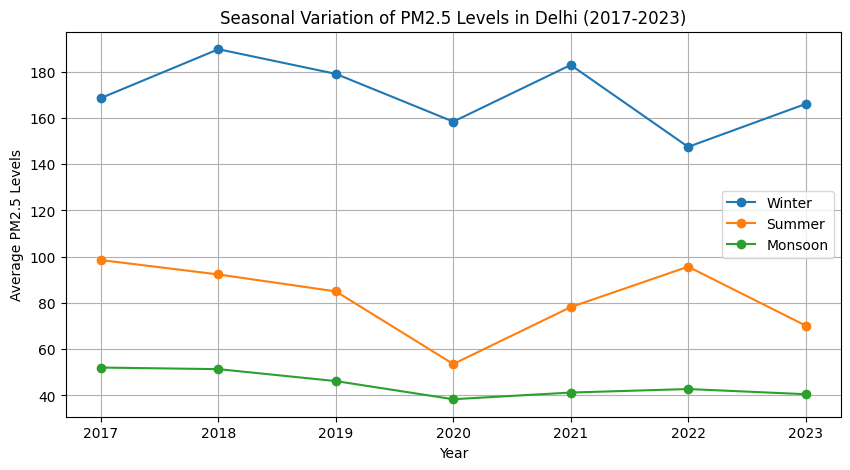

In [3]:
#2
df["PM2.5"] = pd.to_numeric(df["PM2.5"], errors='coerce')
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df_delhi = df[(df["state"] == "Delhi") & (df["Timestamp"].dt.year.between(2017, 2023))]

winter_months = [12, 1, 2]
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

def get_season(month):
    if month in winter_months:
        return "Winter"
    elif month in summer_months:
        return "Summer"
    elif month in monsoon_months:
        return "Monsoon"
    else:
        return "Other"
df_delhi["Season"] = df_delhi["Timestamp"].dt.month.apply(get_season)
seasonal_avg_pm25 = df_delhi.groupby([df_delhi["Timestamp"].dt.year, "Season"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
for season in ["Winter", "Summer", "Monsoon"]:
    plt.plot(seasonal_avg_pm25.index, seasonal_avg_pm25[season], marker='o', linestyle='-', label=season)

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.legend()
plt.grid()
plt.show()


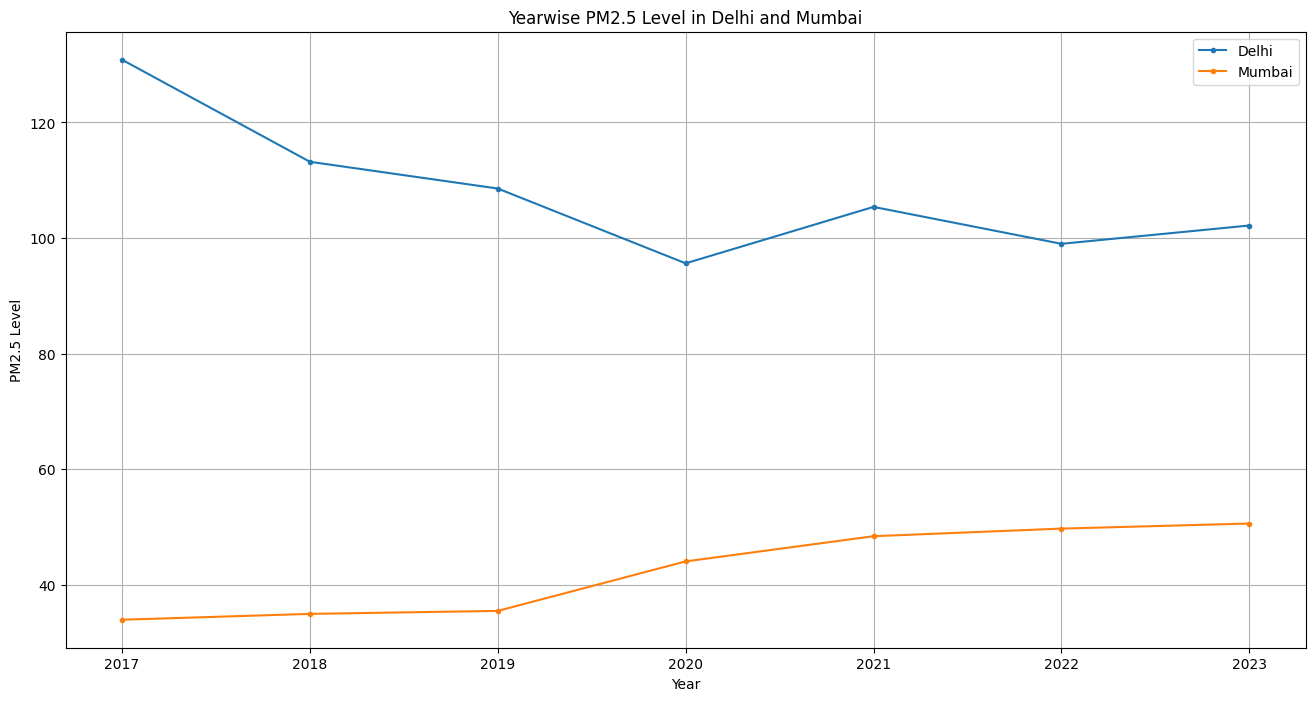

In [45]:
#3
import numpy as np
years = np.arange(2017,2024)
delhi_data = []
mumbai_data = []
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

# Finding PM2.5 values for Delhi and Mumbai from 2015-2023
for year in years:
  delhi_val = data.loc[(data['state'] == 'Delhi') & (data['Timestamp'].dt.year == year)]['PM2.5'].mean()
  delhi_data.append(delhi_val)
  mumbai_val = data.loc[(data['station'].str.contains('Mumbai', na = False)) & (data['Timestamp'].dt.year == year)]['PM2.5'].mean()
  mumbai_data.append(mumbai_val)

# Plotting graph
plt.figure(figsize = (16,8))
plt.plot(years, delhi_data, marker = '.', label = 'Delhi')
plt.plot(years, mumbai_data, marker = '.', label = 'Mumbai')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.title('Yearwise PM2.5 Level in Delhi and Mumbai')
plt.grid(True)
plt.legend()
plt.show()

# Population-Based

In [5]:
#1
data_station=data.groupby('state')['station'].nunique()
state_merge=pd.merge(state_data,data_station,left_on='State',right_on='state')
state_merge['population_stations']=state_merge['station']/state_merge['Population']

max_index=state_merge['population_stations'].idxmax() 
max_state=state_merge.loc[max_index,'State']

print(max_state)

Chandigarh


C:\Users\Ch.K Harshith Sai\AppData\Local\Temp\ipykernel_2604\2536657884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023["PM2.5"] = pd.to_numeric(data_2023["PM2.5"], errors='coerce')


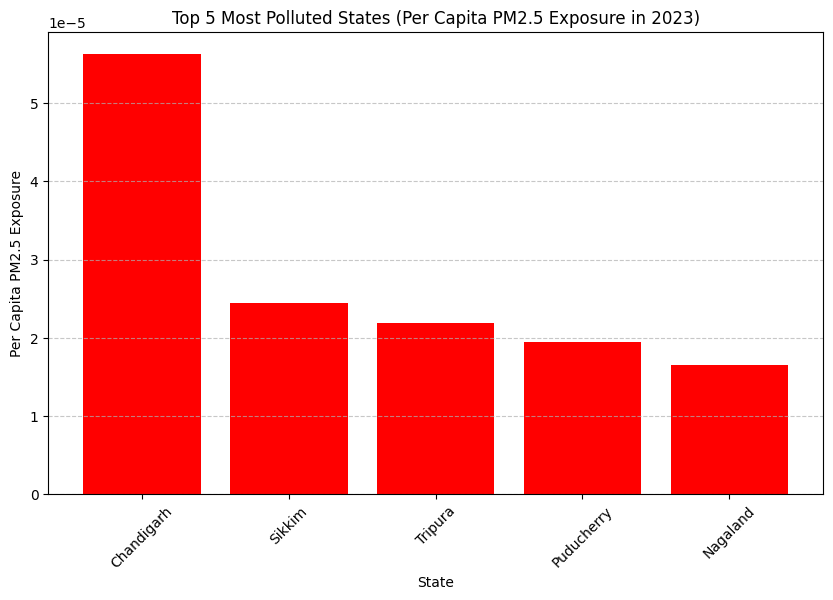

In [11]:
#2
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')
data["state"] = data["state"].str.strip().str.title()
state_data["State"] = state_data["State"].str.strip().str.title()
data_2023 = data[data["Timestamp"].dt.year == 2023]
data_2023["PM2.5"] = pd.to_numeric(data_2023["PM2.5"], errors='coerce')
state_avg_pm25 = data_2023.groupby("state")["PM2.5"].mean().reset_index()
state_avg_pm25.rename(columns={"state": "State"}, inplace=True)

df_combined = pd.merge(state_data, state_avg_pm25, on="State", how="inner")
df_combined["Per_Capita_PM2.5"] = df_combined["PM2.5"] / df_combined["Population"]
top5_states = df_combined.nlargest(5, "Per_Capita_PM2.5")

plt.figure(figsize=(10, 6))
plt.bar(top5_states["State"], top5_states["Per_Capita_PM2.5"], color='red')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure in 2023)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\Ch.K Harshith Sai\AppData\Local\Temp\ipykernel_6996\391512086.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023["PM2.5"] = pd.to_numeric(data_2023["PM2.5"], errors='coerce')


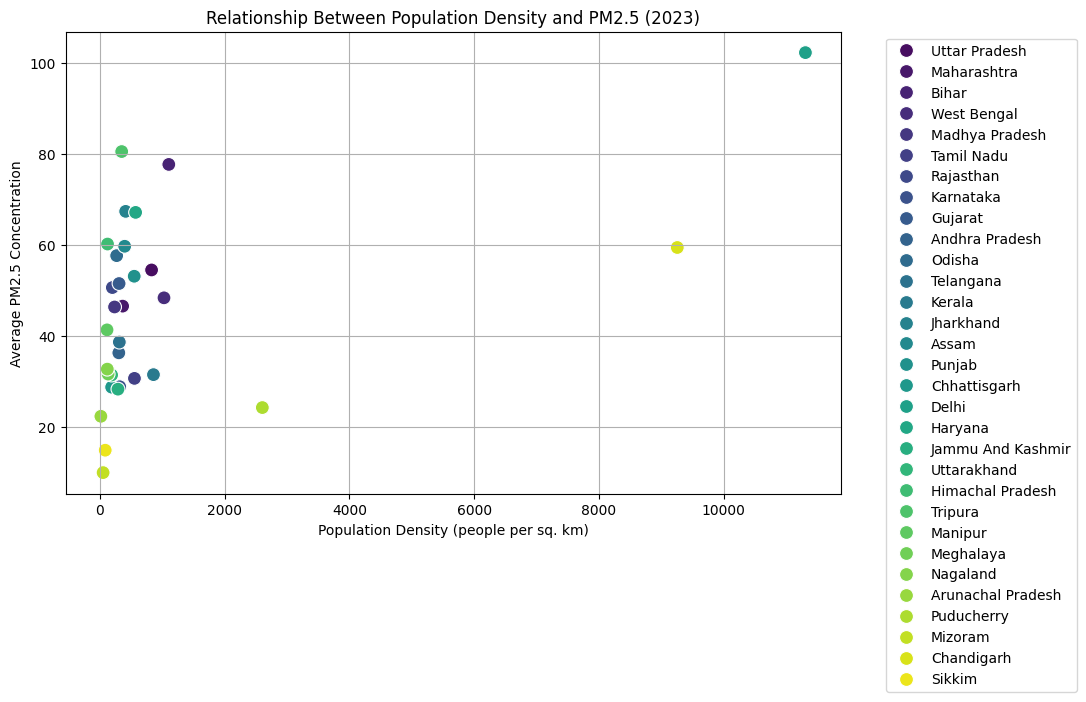

In [5]:
#3
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

# Standardize state names for merging
data["state"] = data["state"].str.strip().str.title()
state_data["State"] = state_data["State"].str.strip().str.title()

# Filter data for 2023
data_2023 = data[data["Timestamp"].dt.year == 2023]

# Convert PM2.5 to numeric, dropping errors
data_2023["PM2.5"] = pd.to_numeric(data_2023["PM2.5"], errors='coerce')

# Compute average PM2.5 per state
state_avg_pm25 = data_2023.groupby("state")["PM2.5"].mean().reset_index()
state_avg_pm25.rename(columns={"state": "State"}, inplace=True)

# Merge with state data (Population & Area)
df_combined = pd.merge(state_data, state_avg_pm25, on="State", how="inner")

# Calculate Population Density (people per square kilometer)
df_combined["Population Density"] = df_combined["Population"] / df_combined["Area (km2)"]

# Scatter plot for Population Density vs. Average PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x="Population Density", y="PM2.5", hue="State", palette="viridis", s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add labels and title
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and PM2.5 (2023)")
plt.grid(True)
plt.show()

# Area Based


State with the highest PM2.5 concentration per square kilometer: Chandigarh


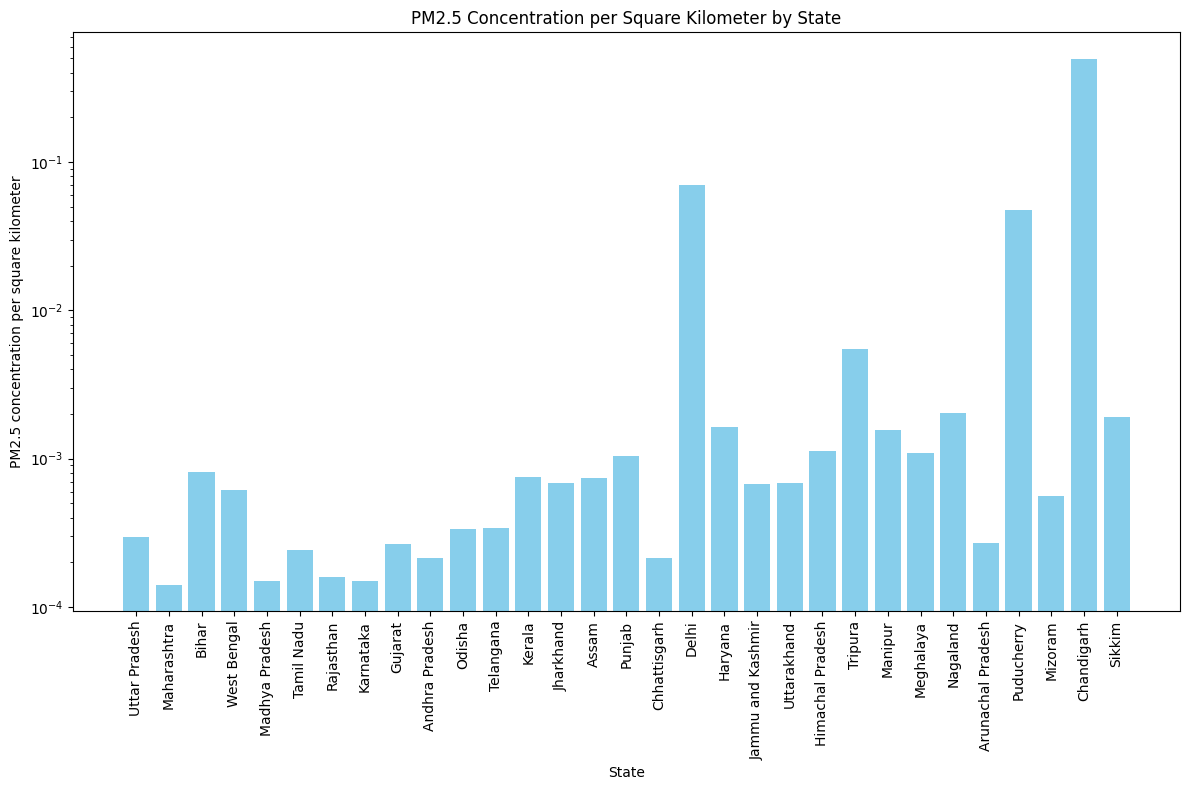

In [14]:
#1
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors='coerce')

# Compute average PM2.5 levels for each state
data_state_group = data.groupby('state')['PM2.5'].mean()

# Merge with state data
data_merged = pd.merge(state_data, data_state_group, left_on='State', right_on='state', how='left')
data_merged = data_merged.dropna()

# Calculate PM2.5 concentration per square kilometer
data_merged['PM2.5 per sq km'] = data_merged['PM2.5'] / data_merged['Area (km2)']

# Identify the state with the highest PM2.5 per square kilometer
max_index = data_merged['PM2.5 per sq km'].idxmax()
max_state = data_merged.loc[max_index, 'State']
print("State with the highest PM2.5 concentration per square kilometer:", max_state)

# Plot PM2.5 per square kilometer for all states
plt.figure(figsize=(12, 8))
plt.bar(data_merged['State'], data_merged['PM2.5 per sq km'], color='skyblue')
plt.xlabel("State")
plt.ylabel("PM2.5 concentration per square kilometer")
plt.xticks(rotation=90)
plt.title("PM2.5 Concentration per Square Kilometer by State")
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()


State with highest density of monitoring stations relative to its area: Delhi 



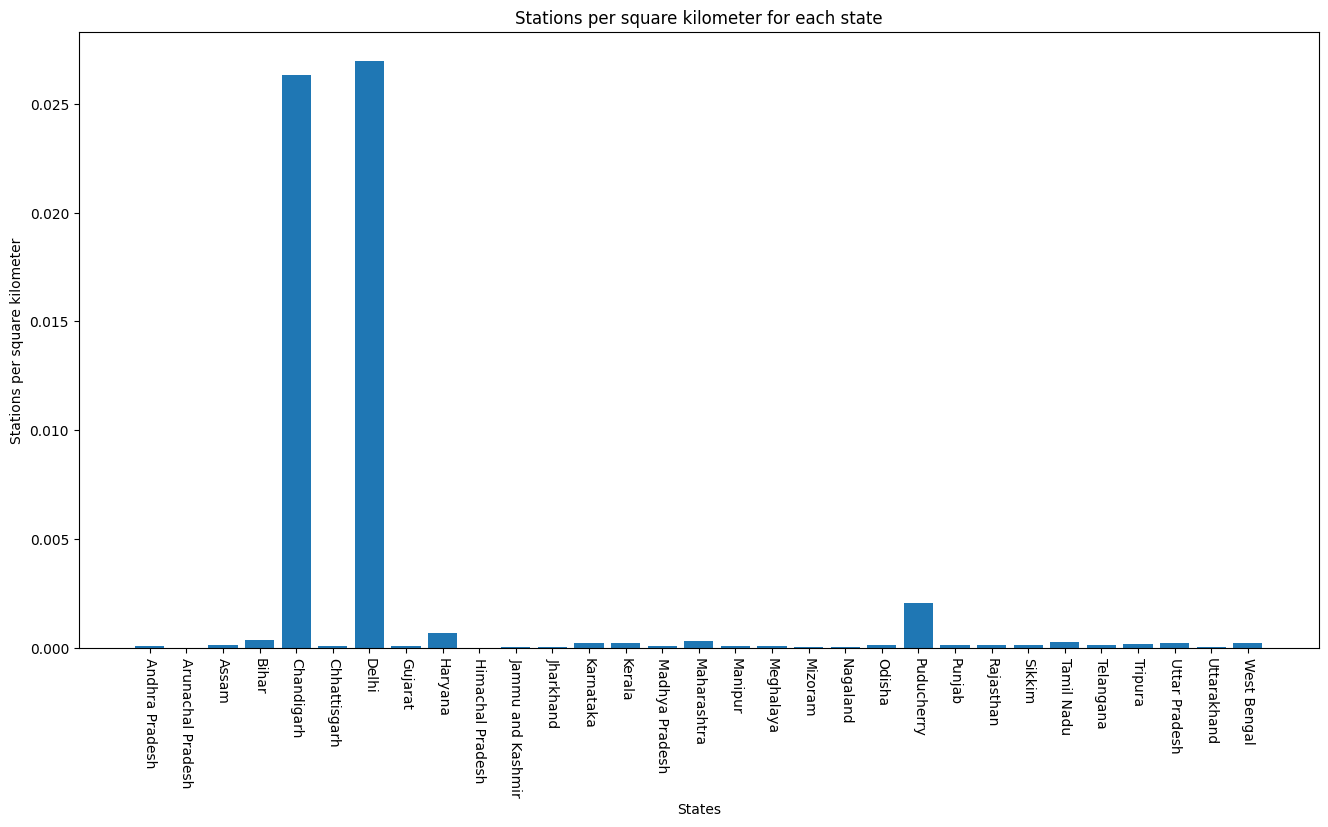

In [13]:
#2
no_of_stations = pd.DataFrame(data.groupby('state')['station'].nunique())
merged_df = pd.merge(no_of_stations, state_data, left_on = 'state', right_on = 'State')
merged_df['Stations per sq km'] = merged_df['station']/merged_df['Area (km2)']

# Finding state with highest density of monitoring stations relative to its area
merged_df.set_index('State', inplace = True)
highest_conc = merged_df['Stations per sq km'].idxmax()
print('State with highest density of monitoring stations relative to its area:', highest_conc, '\n')

# Plotting bar graph
merged_df.reset_index(inplace = True)
plt.figure(figsize = (16,8))
plt.bar(merged_df['State'], merged_df['Stations per sq km'])
plt.xticks(rotation = -90)
plt.xlabel('States')
plt.ylabel('Stations per square kilometer')
plt.title('Stations per square kilometer for each state')
plt.show()

In [20]:
#3
bool_mask = (data['date'].dt.year == 2021)
data_2021 = data[bool_mask]

# Finding average PM2.5 values for all states and extracting values for Maharashtra and Madhya Pradesh
pm25_levels_2021 = data_2021.groupby('state')['PM2.5'].mean()
print('Average PM2.5 levels in Maharashtra:', pm25_levels_2021['Maharashtra'])
print('Average PM2.5 levels in Madhya Pradesh:', pm25_levels_2021['Madhya Pradesh'])

# Finding population density
pop_density = state_data['Population']/state_data['Area (km2)']
print('Population density of Maharashtra:', pop_density[state_data[state_data['State'] == 'Maharashtra'].index.values[0]])
print('Population density of Madhya Pradesh:', pop_density[state_data[state_data['State'] == 'Madhya Pradesh'].index.values[0]])
print('Area of Maharashtra (km2):', state_data.loc[state_data['State'] == 'Maharashtra', 'Area (km2)'].values[0])
print('Area of Madhya Pradesh (km2):', state_data.loc[state_data['State'] == 'Madhya Pradesh', 'Area (km2)'].values[0])

Average PM2.5 levels in Maharashtra: 46.44004417107664
Average PM2.5 levels in Madhya Pradesh: 47.095951831498965
Population density of Maharashtra: 365.1920230864474
Population density of Madhya Pradesh: 235.60855728429985
Area of Maharashtra (km2): 307713
Area of Madhya Pradesh (km2): 308252


# Funding Based

In [27]:
#1
funding_2021 = pd.DataFrame(funding.groupby('State')['2021-22'].sum()).reset_index()
funding_2021 = funding_2021[funding_2021['2021-22'] != 0]
funded_states = funding_2021['State']
non_funded_states = data.loc[~data['state'].isin(funded_states), 'state'].dropna().unique()

# Finding average of funded and non funded states
funded_avg = data.loc[(data['state'].isin(funded_states)) & (data['date'].dt.year == 2021)]['PM2.5'].mean()
non_funded_avg = data.loc[(data['state'].isin(non_funded_states)) & (data['date'].dt.year == 2021)]['PM2.5'].mean()
print('Average PM2.5 level in funded states:', funded_avg)
print('Average PM2.5 level in non funded states:', non_funded_avg)

Average PM2.5 level in funded states: 65.35219325523295
Average PM2.5 level in non funded states: 55.346279326953784


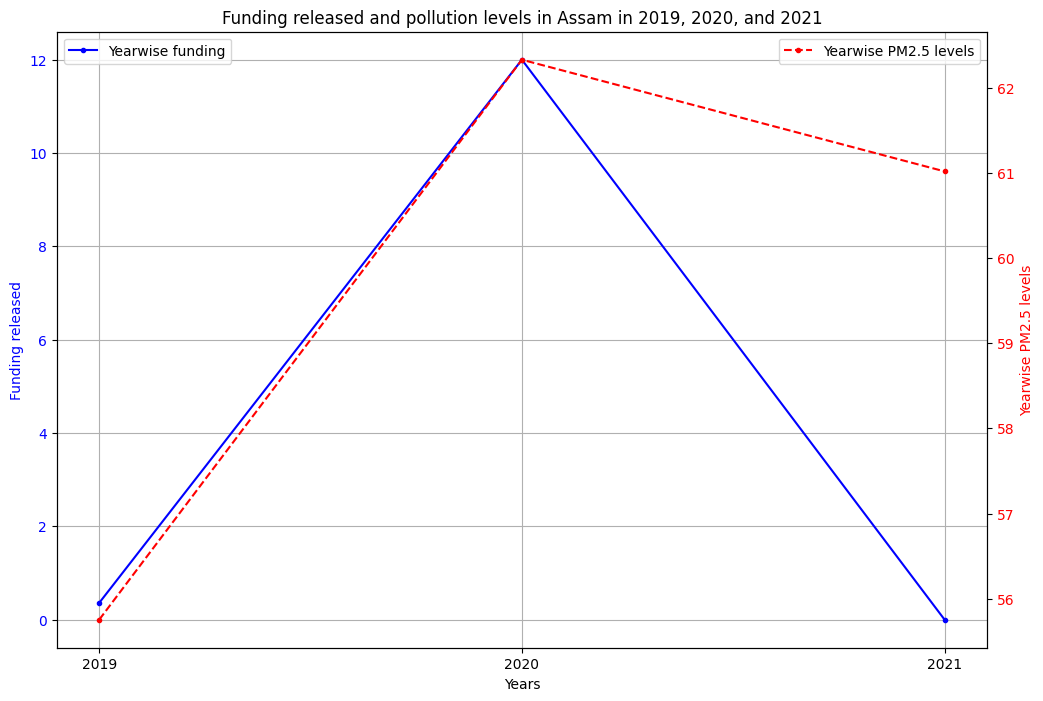

In [28]:
#2
years = [2019,2020,2021]
yearwise_funding = []
yearwise_pollution = []
for year in years:
  yearwise_funding.append(funding[f'{year}-{year+1-2000}'].loc[funding['State'] == 'Assam'].sum())
  yearwise_pollution.append(data[(data['date'].dt.year == year) & (data['state'] == 'Assam')]['PM2.5'].mean())
fig, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(years, yearwise_funding, label = 'Yearwise funding', color = 'blue', marker = '.')
ax1.set_xlabel('Years')
ax1.set_ylabel('Funding released', color = 'blue')
ax2 = ax1.twinx()
ax2.plot(years, yearwise_pollution, label = 'Yearwise PM2.5 levels', color = 'red', linestyle = '--', marker = '.')
ax2.set_ylabel('Yearwise PM2.5 levels', color = 'red')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
plt.xticks(years)
ax1.grid(True)
plt.title('Funding released and pollution levels in Assam in 2019, 2020, and 2021')
plt.show()

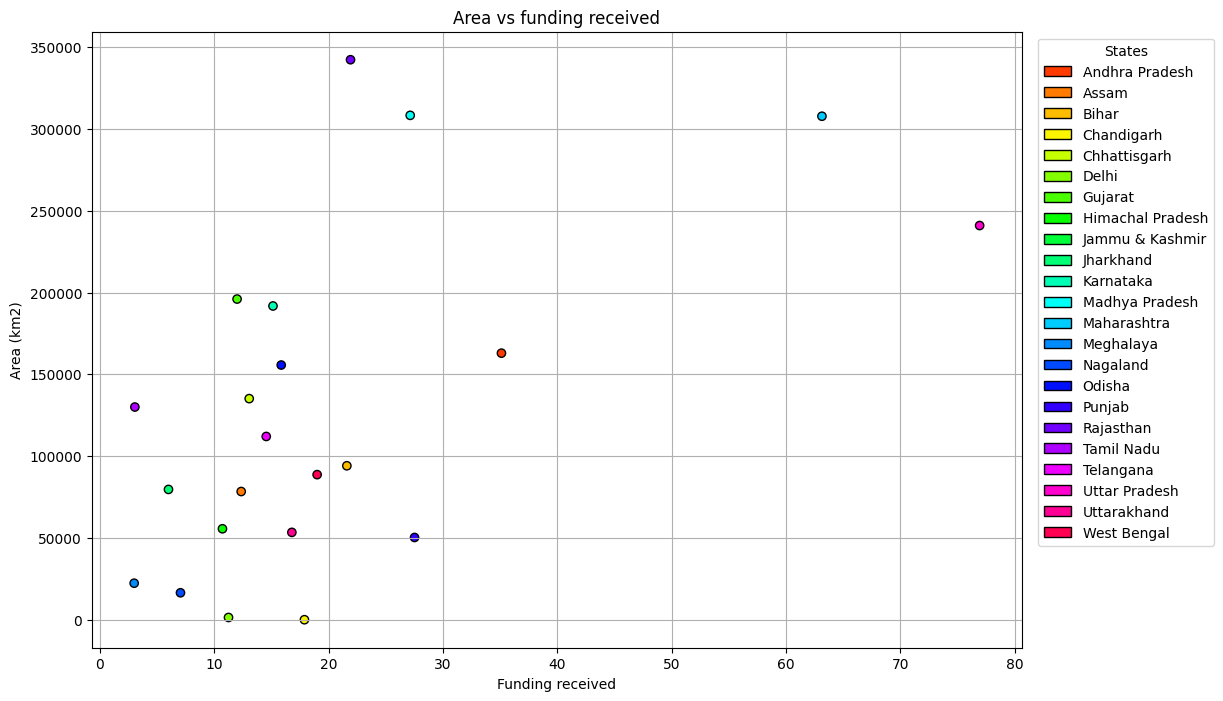

In [38]:
#3
statewise_funding = pd.DataFrame(funding.groupby('State')['Total fund released'].sum()).reset_index()
statewise_funding = pd.merge(statewise_funding, state_data[['State', 'Area (km2)']], on = 'State', how = 'left')

# Plotting scatterplot
colors = sns.color_palette("hsv", statewise_funding.shape[0]).as_hex()
state_color_map = dict(zip(statewise_funding['State'], colors))
plt.figure(figsize = (12,8))
plt.scatter(statewise_funding['Total fund released'], statewise_funding['Area (km2)'],
            c=[state_color_map[state] for state in statewise_funding['State']], edgecolors = 'black')
legend_patches = [mpatches.Patch(facecolor = color, label = state, edgecolor = 'black') for state, color in state_color_map.items()]
plt.legend(handles = legend_patches, title = "States", bbox_to_anchor = (1.01, 1))
plt.xlabel('Funding received')
plt.ylabel('Area (km2)')
plt.title('Area vs funding received')
plt.grid(True)
plt.show()

# Miscellaneous Questions

In [39]:
#1
data_2023 = data[(data['date'].dt.year == 2023)]

# Finding most polluted city
citywise_avg = data_2023.groupby('city')['PM2.5'].mean()
max_city = citywise_avg.idxmax()
print(f'Most polluted city in 2023: {max_city}')

# Calculating percentage
hazardous_days = data_2023.loc[(data_2023['city'] == max_city) & (data_2023['PM2.5'] >= 300)].groupby('Timestamp')['PM2.5'].mean()
total_days = data_2023.loc[data_2023['city'] == max_city].groupby('Timestamp').count()
percent = 100 * hazardous_days.shape[0]/total_days.shape[0]
print(f'Percentage of days in {max_city} with PM2.5 levels above hazardous threshold: {round(percent,2)}%')


Most polluted city in 2023: Darbhanga
Percentage of days in Darbhanga with PM2.5 levels above hazardous threshold: 0.82%


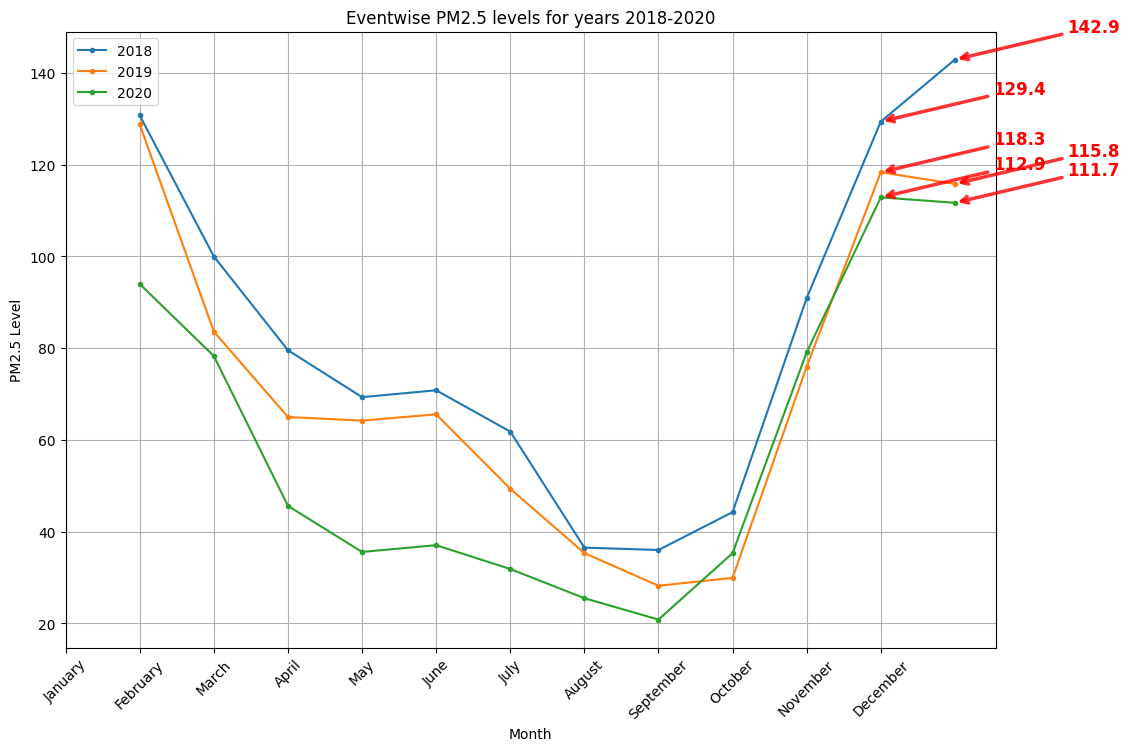

In [40]:
#2
years = [2018, 2019, 2020]
plt.figure(figsize = (12,8))
for year in years:
  monthly_avg = data[data['date'].dt.year == year].groupby(data['date'].dt.month)['PM2.5'].mean()
  plt.plot(np.arange(1, 13), monthly_avg, label=str(year), marker='.')
  for i, val in enumerate(monthly_avg):
        if val > 100:
          if (i + 1) > 10:
            plt.annotate(f"{val:.1f}",
                         (i + 1, val),
                         textcoords = "offset points",
                         xytext = (100, 20),
                         ha = 'center',
                         fontsize = 12,
                         fontweight = 'bold',
                         color = 'red',
                         arrowprops = dict(arrowstyle = "->", linewidth = 2.5, color = 'red', alpha = 0.8))
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('Eventwise PM2.5 levels for years 2018-2020')
plt.xticks(np.arange(0, 12), ['January', 'February', 'March', 'April', 'May', 'June',
                              'July', 'August', 'September', 'October', 'November', 'December'], rotation = 45)
plt.grid(True)
plt.legend()
plt.show()

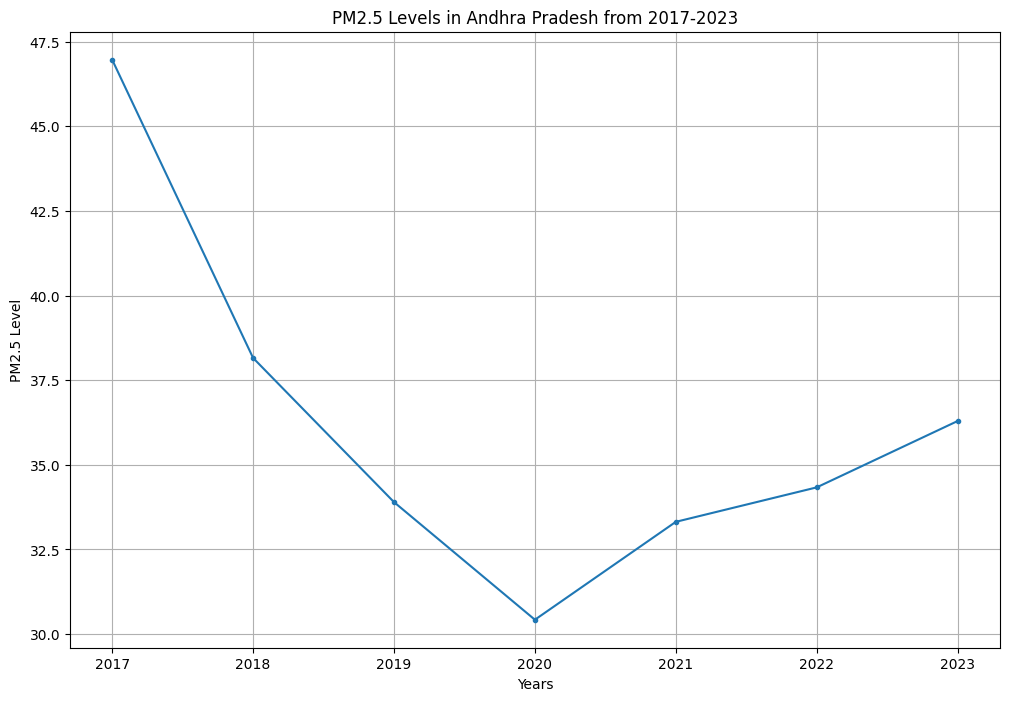

In [43]:
#3
funding_2020 = funding.groupby('State')['2020-21'].sum()
highest_funded = funding_2020.idxmax()

years = np.arange(2017,2024)
levels = []
for year in years:
  pm25_level = data[(data['date'].dt.year == year) & (data['state'] == highest_funded)]['PM2.5'].mean()
  levels.append(pm25_level)

plt.figure(figsize = (12,8))
plt.plot(years, levels, marker = '.')
plt.xticks(years)
plt.title(f'PM2.5 Levels in {highest_funded} from 2017-2023')
plt.xlabel('Years')
plt.ylabel('PM2.5 Level')
plt.grid(True)
plt.show()

C:\Users\Ch.K Harshith Sai\AppData\Roaming\Python\Python313\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Ch.K Harshith Sai\AppData\Roaming\Python\Python313\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


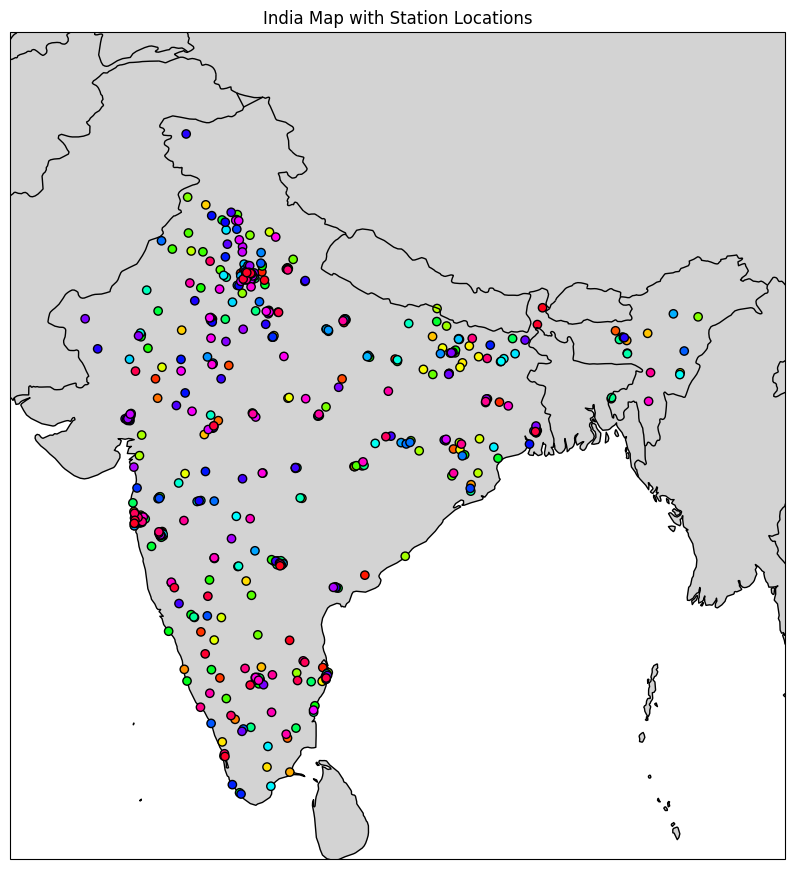

In [44]:
#4
geographical_data = data[['city', 'latitude', 'longitude', 'station']]
geographical_data = geographical_data.drop_duplicates(subset=['station'])

# Creating plot
fig, ax = plt.subplots(figsize = (10, 12), subplot_kw = {'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, edgecolor = "black", facecolor = "lightgray")
ax.add_feature(cfeature.BORDERS, edgecolor = "black")
ax.set_extent([68, 98, 6, 38], crs = ccrs.PlateCarree())
colors = sns.color_palette("hsv", geographical_data.shape[0])
ax.scatter(geographical_data['longitude'], geographical_data['latitude'],
           color = colors, marker = 'o',edgecolor = "black", transform = ccrs.PlateCarree())
plt.title("India Map with Station Locations")
plt.show()

# Tell us something new